In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import kruskal
from scipy.stats import shapiro
from scipy.stats import chi2_contingency

In [3]:
df = pd.read_csv("C:/Users/Madhuri/Desktop/DS-ML/testing/data/bike_sharing.csv")

In [4]:
df.shape

(10886, 12)

In [5]:
df.sample(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
5113,2011-12-07 03:00:00,4,0,1,3,18.86,22.725,100,15.0013,0,3,3
7337,2012-05-05 02:00:00,2,0,0,1,23.78,27.275,88,0.0000,24,51,75
10356,2012-11-16 22:00:00,4,0,1,1,13.12,15.150,53,16.9979,23,139,162
6128,2012-02-11 14:00:00,1,0,0,2,10.66,12.120,81,16.9979,38,205,243
3176,2011-08-02 06:00:00,3,0,1,1,27.88,31.820,69,7.0015,12,105,117
10367,2012-11-17 09:00:00,4,0,0,1,13.94,15.910,49,15.0013,48,200,248
10224,2012-11-11 10:00:00,4,0,0,1,16.40,20.455,69,7.0015,133,272,405
2491,2011-06-11 17:00:00,2,0,0,2,30.34,34.090,58,11.0014,147,190,337
1951,2011-05-08 05:00:00,2,0,0,2,18.04,21.970,77,0.0000,0,5,5
5549,2012-01-06 08:00:00,1,0,1,1,9.84,12.120,70,8.9981,11,436,447


#### Table metadata and datatypes of all columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


#### Checking empty or null value count

In [7]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

#### Metadata information related to few numeric columns

In [8]:
df[["casual","registered","count"]].describe()

,casual,registered,count
count,10886.000000,10886.000000,10886.000000
mean,36.021955,155.552177,191.574132
std,49.960477,151.039033,181.144454
min,0.000000,0.000000,1.000000
25%,4.000000,36.000000,42.000000
50%,17.000000,118.000000,145.000000
75%,49.000000,222.000000,284.000000
max,367.000000,886.000000,977.000000


#### Count based on seasons

In [9]:
df["season"].value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

#### Count for work day and holiday

In [10]:
df["workingday"].value_counts()

workingday
1    7412
0    3474
Name: count, dtype: int64

#### Count based on weather

In [11]:
df["weather"].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

#### Total ride by casual users

In [12]:
df["casual"].sum()

392135

#### Total ride by registered users

In [13]:
df["registered"].sum()

1693341

In [14]:
pd.crosstab(index = df["weather"],columns = df["season"],margins=True)

season,1,2,3,4,All
weather,,,,,
1,1759,1801,1930,1702,7192
2,715,708,604,807,2834
3,211,224,199,225,859
4,1,0,0,0,1
All,2686,2733,2733,2734,10886


#### 

In [15]:
pd.crosstab(index = df["weather"],columns = df["workingday"],margins=True,normalize = True)

workingday,0,1,All
weather,,,
1,0.216149,0.444516,0.660665
2,0.082399,0.177935,0.260334
3,0.020577,0.058332,0.078909
4,0.000000,0.000092,0.000092
All,0.319125,0.680875,1.000000


In [16]:
df_weather_1 = df[df["weather"] == 1].reset_index(drop=True)
df_weather_2 = df[df["weather"] == 2].reset_index(drop=True)
df_weather_3 = df[df["weather"] == 3].reset_index(drop=True)
df_weather_4 = df[df["weather"] == 4].reset_index(drop=True)

In [17]:
df_weather_ride_count = df.groupby("weather")["count"].sum().reset_index()

In [18]:
df_weather_ride_count

,weather,count
0,1,1476063
1,2,507160
2,3,102089
3,4,164


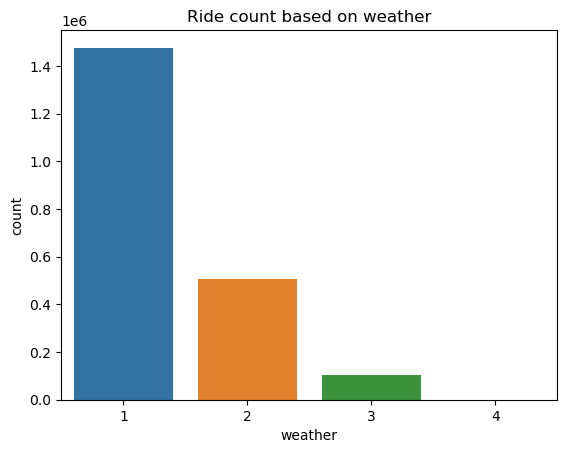

In [19]:
sns.barplot(data=df_weather_ride_count , x= "weather",y="count")
plt.title("Ride count based on weather")
plt.show()

In [20]:
df_weather_ride_category = df.groupby("weather")[["casual","registered"]].agg("sum").reset_index()

In [21]:
df_weather_ride_category

,weather,casual,registered
0,1,289900,1186163
1,2,87246,419914
2,3,14983,87106
3,4,6,158


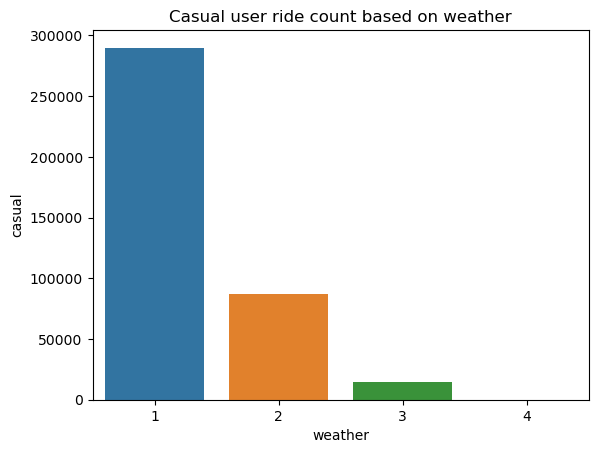

In [22]:
sns.barplot(data=df_weather_ride_category , x= "weather",y="casual")
plt.title("Casual user ride count based on weather")
plt.show()

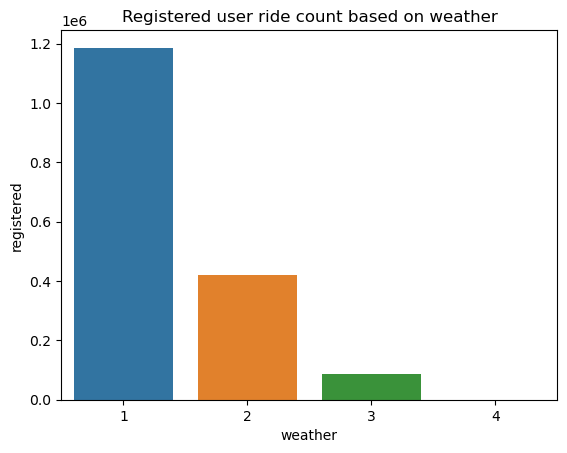

In [23]:
sns.barplot(data=df_weather_ride_category , x= "weather",y="registered")
plt.title("Registered user ride count based on weather")
plt.show()

In [24]:
df_season_ride_count = df.groupby("season")["count"].sum().reset_index()

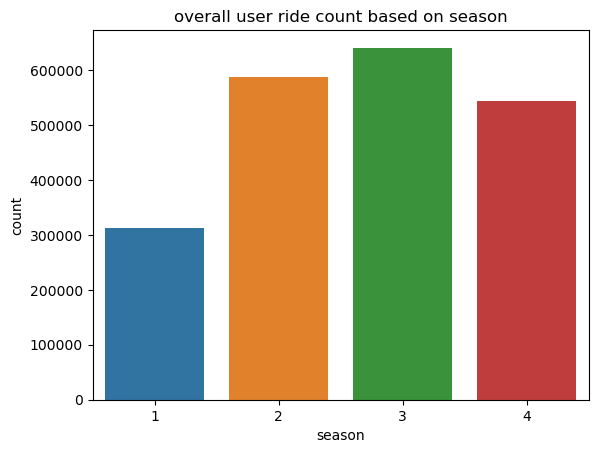

In [25]:
sns.barplot(data=df_season_ride_count , x= "season",y="count")
plt.title("overall user ride count based on season")
plt.show()

In [26]:
df_season_ride_category = df.groupby("season")[["casual","registered"]].agg("sum").reset_index()

In [27]:
df_season_ride_category

,season,casual,registered
0,1,41605,270893
1,2,129672,458610
2,3,142718,497944
3,4,78140,465894


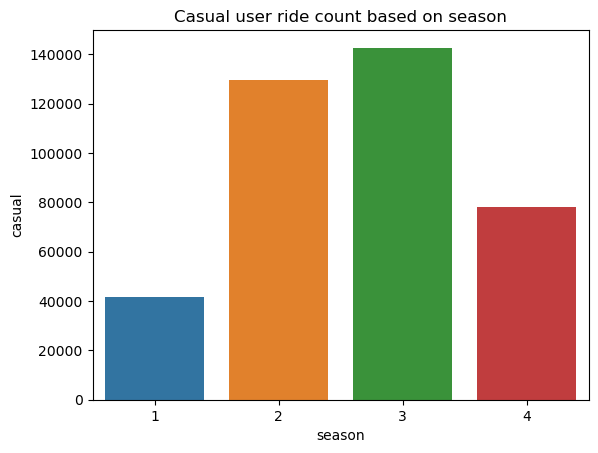

In [28]:
sns.barplot(data=df_season_ride_category , x= "season",y="casual")
plt.title("Casual user ride count based on season")
plt.show()

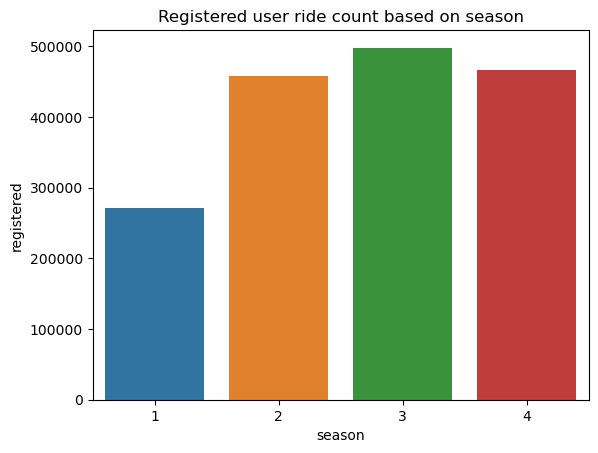

In [29]:
sns.barplot(data=df_season_ride_category , x= "season",y="registered")
plt.title("Registered user ride count based on season")
plt.show()

In [30]:
df_wd_ride_count = df.groupby("workingday")["count"].sum().reset_index()

In [31]:
df_wd_ride_count

,workingday,count
0,0,654872
1,1,1430604


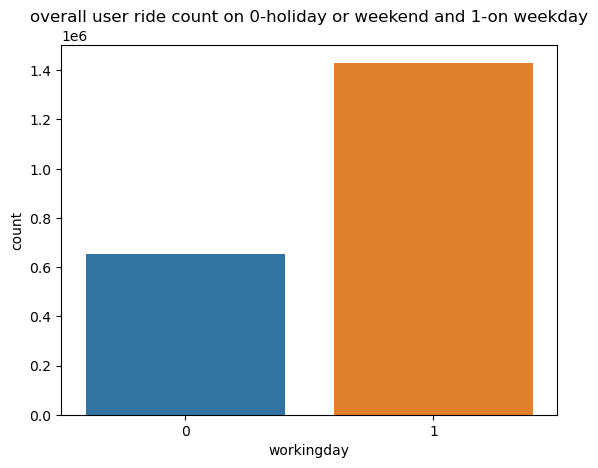

In [32]:
sns.barplot(data=df_wd_ride_count , x= "workingday",y="count")
plt.title("overall user ride count on 0-holiday or weekend and 1-on weekday")
plt.show()

In [33]:
df_wd_ride_category = df.groupby("workingday")[["casual","registered"]].agg("sum").reset_index()

In [34]:
df_wd_ride_category

,workingday,casual,registered
0,0,206037,448835
1,1,186098,1244506


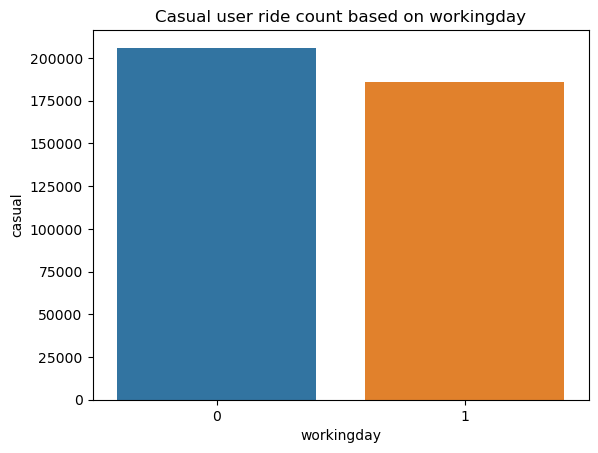

In [35]:
sns.barplot(data=df_wd_ride_category , x= "workingday",y="casual")
plt.title("Casual user ride count based on workingday")
plt.show()

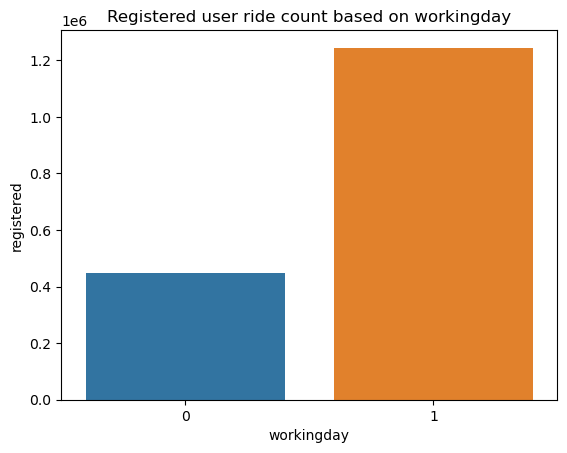

In [36]:
sns.barplot(data=df_wd_ride_category , x= "workingday",y="registered")
plt.title("Registered user ride count based on workingday")
plt.show()

In [37]:
df["datetime"] = pd.to_datetime(df["datetime"])

In [38]:
df["event_date"] =  df["datetime"].dt.date
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  event_date  10886 non-null  object        
 13  year        10886 non-null  int32         
 14  month       10886 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(2), int64(8), object(1)
memory

In [40]:
df_year_data = df.groupby("year")[["casual","registered"]].agg("sum").reset_index()

In [41]:
df_year_data

,year,casual,registered
0,2011,155817,626162
1,2012,236318,1067179


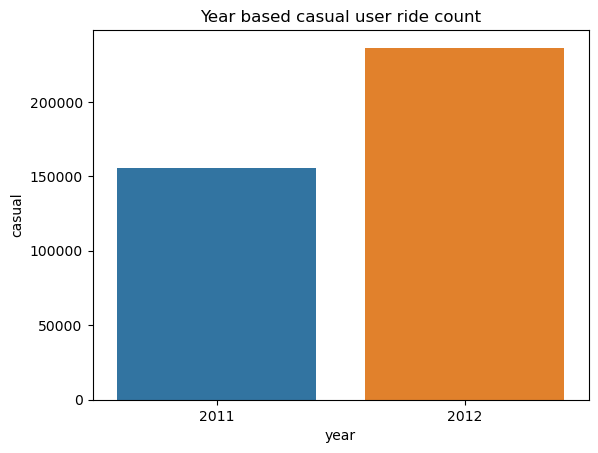

In [42]:
sns.barplot(data=df_year_data , x= "year",y="casual")
plt.title("Year based casual user ride count")
plt.show()

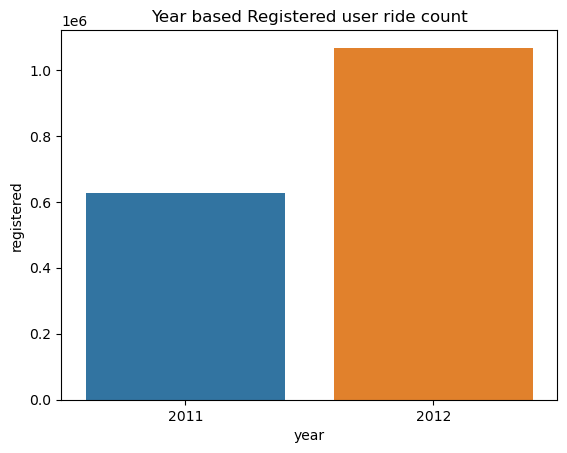

In [43]:
sns.barplot(data=df_year_data , x= "year",y="registered")
plt.title("Year based Registered user ride count")
plt.show()

In [44]:
df_month_data = df.groupby("month")[["casual","registered"]].agg("sum").reset_index()
df_month_data

,month,casual,registered
0,1,7252,72632
1,2,9297,89816
2,3,25056,108445
3,4,39813,127589
4,5,41285,158862
5,6,48574,172159
6,7,50947,163670
7,8,45870,167646
8,9,45901,166628
9,10,38087,169347


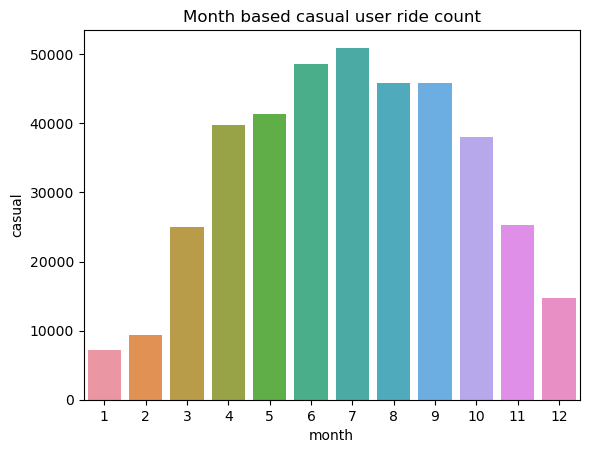

In [45]:
sns.barplot(data=df_month_data , x= "month",y="casual")
plt.title("Month based casual user ride count")
plt.show()

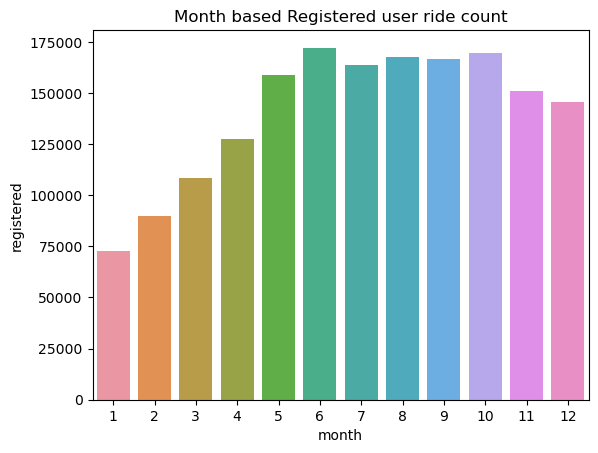

In [46]:
sns.barplot(data=df_month_data , x= "month",y="registered")
plt.title("Month based Registered user ride count")
plt.show()

In [47]:
df_month_temp = df.groupby("month")["atemp"].mean().reset_index()

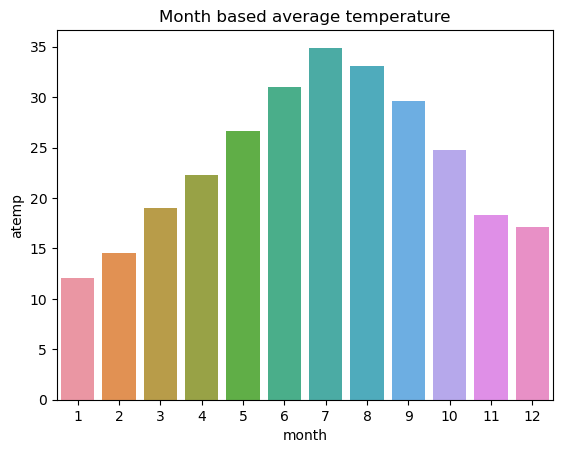

In [48]:
sns.barplot(data=df_month_temp , x= "month",y="atemp")
plt.title("Month based average temperature")
plt.show()

In [49]:
df_month_data_temp = df_month_data.merge(df_month_temp,on="month",how="inner")

C:\Users\Madhuri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Madhuri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


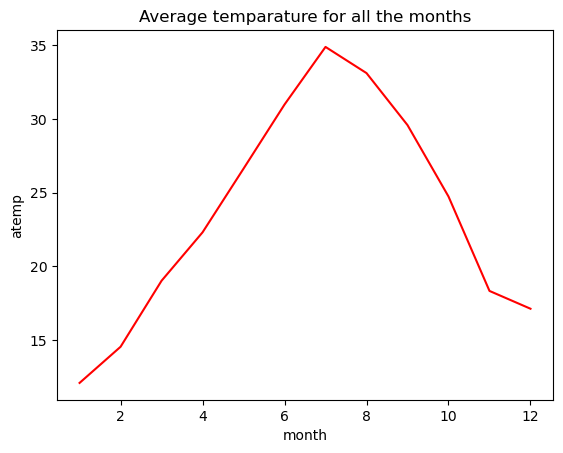

In [50]:
sns.lineplot(data=df_month_data_temp,x="month",y="atemp",color="red")
plt.title("Average temparature for all the months")
plt.show()

### Months from April to October has  highest riding.During this period the tempartue is as high as 34 and as low as 24 which is ideal to rid a bicycle/ev in India.

In [51]:
df_month_data_temp

,month,casual,registered,atemp
0,1,7252,72632,12.077579
1,2,9297,89816,14.532608
2,3,25056,108445,19.017220
3,4,39813,127589,22.305891
4,5,41285,158862,26.632374
5,6,48574,172159,30.988750
6,7,50947,163670,34.900395
7,8,45870,167646,33.122001
8,9,45901,166628,29.590248
9,10,38087,169347,24.739682


### Test:1  Is Working Day has an effect on the number of electric cycles rented

<b>m1</b> is defined as mean for ride count on working days.</br>
<b>m2</b> is defined as mean for ride count on non-working days.</br>
<b>H0</b> : <b>m1 = m2</b>. Mean ride count are same on both working and non-working days. </br>
Significant level : 95% or <b>0.95</b></br>
alpha = 1 - Significant level</br>
alpha = <b>0.05</b></br>


In [52]:
def check(pvalue,alpha):
    if pvalue < alpha:
        print('Reject H0')
    else:
        print ('Fail to Reject H0')

In [53]:
df_day = df.groupby("event_date")["count"].agg("sum").reset_index()

In [54]:
df_day_tmp = df.groupby("event_date")["workingday"].agg(pd.Series.mode).reset_index()

In [55]:
df_day = df_day.merge(df_day_tmp,on="event_date",how = "inner")

In [56]:
df_working_day = df_day[df["workingday"] == 1]
df_non_working_day = df_day[df["workingday"] == 0]
alpha = 0.05

C:\Users\Madhuri\AppData\Local\Temp\ipykernel_8576\1320077117.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_working_day = df_day[df["workingday"] == 1]
C:\Users\Madhuri\AppData\Local\Temp\ipykernel_8576\1320077117.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_non_working_day = df_day[df["workingday"] == 0]


<b> Option 1</b> : <b>Ha</b> : <b>m1 != m2</b>.Mean ride count are <b>not</b> same on both working and non-working days. </br>

In [57]:
t_stat_1, pvalue_1 = ttest_ind(df_working_day["count"], df_non_working_day["count"],alternative = "two-sided")
t_stat_1, pvalue_1

(0.03402448392560522, 0.9728725802897569)

In [58]:
check(pvalue_1,alpha)

Fail to Reject H0


<b> Option 2</b> : <b>Ha</b> : <b>m1 less than m2</b>.</br>

In [59]:
t_stat_2, pvalue_2 = ttest_ind(df_working_day["count"], df_non_working_day["count"],alternative = "less")
t_stat_2, pvalue_2

(0.03402448392560522, 0.5135637098551216)

In [60]:
check(pvalue_2,alpha)

Fail to Reject H0


<b> Option 3</b> : <b>Ha</b> : <b>m1 greater than m2</b>.</br>

In [61]:
t_stat_3, pvalue_3 = ttest_ind(df_working_day["count"], df_non_working_day["count"],alternative = "greater")
t_stat_3, pvalue_3

(0.03402448392560522, 0.48643629014487844)

In [62]:
check(pvalue_2,alpha)

Fail to Reject H0


<b>Conclusion</b>: The ride count on a business day is not equal to ride count on non-working days

### Test:2  Number of cycles rented is similar or different in different weather conditions.
#### H0: Number of cycles rented is similar across different weather conditions.
#### H1: Number of cycles rented are different in different weather conditions.

In [63]:
df_weather_daily = df.groupby(['event_date',"weather"]).agg({"count":"sum"}).reset_index()

In [64]:
weather_count_1  = df_weather_daily[df_weather_daily["weather"] == 1]["count"]
weather_count_2  = df_weather_daily[df_weather_daily["weather"] == 2]["count"]
weather_count_3  = df_weather_daily[df_weather_daily["weather"] == 3]["count"]
weather_count_4  = df_weather_daily[df_weather_daily["weather"] == 4]["count"]

### We will do shapiro test to understand if the data to be tested is of gaussian distribution or not.

In [65]:
def test_gaussian(name,p_value):
    if p_value < 0.05:
        print("Reject H0")
        print(f"{name} data is not Gaussian")
    else:
        print("Fail to reject H0")
        print(f"{name} data is Gaussian")

In [66]:
test_stat_1, p_value_1 = shapiro(weather_count_1)
test_gaussian("Weather_count_1",p_value_1)

test_stat_2, p_value_2 = shapiro(weather_count_2)
test_gaussian("Weather_count_2",p_value_2)

test_stat_3, p_value_3 = shapiro(weather_count_3)
test_gaussian("Weather_count_3",p_value_3)

## Since this has only one entry.So it not eligible for shapiro test.
print("Weather count for type 4 is:",len(weather_count_4))

Reject H0
Weather_count_1 data is not Gaussian
Reject H0
Weather_count_2 data is not Gaussian
Reject H0
Weather_count_3 data is not Gaussian
Weather count for type 4 is: 1


#### Since the data is not normalised We use Kruskal-Wallis test to validate the null hypothesis

In [67]:
stat_k, p_value_k = kruskal(weather_count_1,weather_count_2,weather_count_3,weather_count_4)
alpha = 0.05
if p_value_k < alpha:
    print("Reject H0")
else:
    print("Fail to reject H0")
    

Reject H0


#### If H0 is true only when mean of different weather are same.
### Conclusion: Atleast one group have different median so rejecting the H0
### Number of cycles rented are different in different weather conditions

### Test:3  Number of cycles rented is similar or different in different Season conditions.
#### H0: Number of cycles rented is similar across different season conditions.
#### H1: Number of cycles rented are different in different season conditions.

In [68]:
df_season_daily = df.groupby(['event_date',"season"]).agg({"count":"sum"}).reset_index()

In [69]:
season_count_1  = df_season_daily[df_season_daily["season"] == 1]["count"]
season_count_2  = df_season_daily[df_season_daily["season"] == 2]["count"]
season_count_3  = df_season_daily[df_season_daily["season"] == 3]["count"]
season_count_4  = df_season_daily[df_season_daily["season"] == 4]["count"]

In [70]:
test_stat_5, p_value_5 = shapiro(season_count_1)
test_gaussian("season_count_1",p_value_5)

test_stat_6, p_value_6 = shapiro(season_count_2)
test_gaussian("season_count_2",p_value_6)

test_stat_7, p_value_7 = shapiro(season_count_3)
test_gaussian("season_count_3",p_value_7)

test_stat_8, p_value_8 = shapiro(season_count_4)
test_gaussian("season_count_4",p_value_8)

Reject H0
season_count_1 data is not Gaussian
Reject H0
season_count_2 data is not Gaussian
Reject H0
season_count_3 data is not Gaussian
Fail to reject H0
season_count_4 data is Gaussian


#### Since majority of the data is not normalised We use Kruskal-Wallis test to validate the null hypothesis

In [71]:
stat_k, p_value_k = kruskal(season_count_1,season_count_2,season_count_3,season_count_4)
print(p_value_k)
if p_value_k < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

9.111105591373848e-33
Reject H0


#### If H0 is true only when mean of different seasons are same.
### Conclusion: Atleast one group have different median so rejecting the H0.
### Number of cycles rented are different in different Season conditions

### Test:4  Weather is dependent on the season.
#### H0: Weather and season are independent to each other
#### H1: Weather and season are dependent on each other

In [72]:
pd.crosstab(index = df["weather"],columns = df["season"])

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [73]:
chi_stat_c, p_value_c, df_c, exp_freq_c = chi2_contingency(pd.crosstab(index = df["weather"],columns = df["season"]))

print("chi_stat:",chi_stat_c)
print("p_value:",p_value_c)

chi_stat: 49.15865559689363
p_value: 1.5499250736864862e-07


In [74]:
alpha = 0.05

if p_value_c < alpha:
    print("Reject H0")
    print("Weather and season are dependent on each other")
else:
    print("Fail to reject H0")
    print("Weather and season are independent on each other")

Reject H0
Weather and season are dependent on each other


### Conclusion: Weather and season are dependent on each other.